# Systemy uczące się - Zad. dom. 2: Naiwny klassyfikator Bayesa

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:


In [ ]:
NAME = "Dominika Nowak"
ID = ""

Ten notebook zawiera dwa zadania związane z klasyfikatorem naiwnego Bayesa, oprócz implementacji zawiera on równie pytania na które trzeba odpowiedzieć.

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

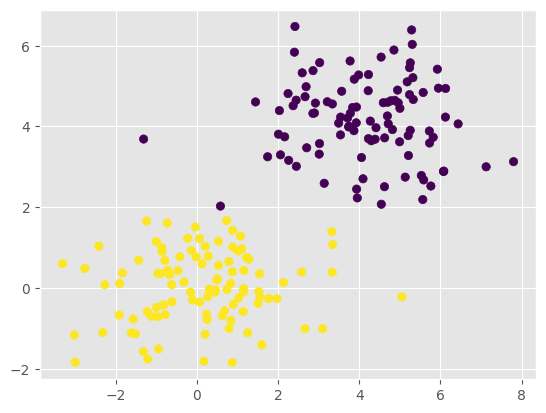

In [37]:
from helpers import generate1, generate2, generate3  # noqa

x, y = generate1()
plt.scatter(x[:, 0], x[:, 1], c=y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [38]:
from scipy.stats import norm

# (x, mean, std)
norm.pdf(5, 0, 1)  # gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1)  # logarytm gęstości prawd. dla 5 z rozkładu standardowego

np.float64(-13.418938533204672)

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [39]:
class GaussianNaiveBayes():
    def __init__(self) -> None:
        self.means = {}
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.stds = {}
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """Funkcja trenująca klasyfikator naiwnego Bayesa na podstawie danych x i y.
        
        Args:
            x (np.ndarray): macierz danych wejściowych, gdzie każdy wiersz to obserwacja
            y (np.ndarray): wektor indeksów klas (0 lub 1) dla każdej obserwacji
            
        Returns:
            None
        """
        # TWÓJ KOD TUTAJ - proces uczenia czyli uzupełniania struktur zainicjaliowanych w init()
        #                  odpowiednimi wartościami
        classes, counts = np.unique(y, return_counts=True)
        self.class_log_prob = np.log(counts / len(y)) # logP(C)

        for cls in classes:
            x_cls = x[y == cls]
            self.means[cls] = np.mean(x_cls, axis=0)
            self.stds[cls] = np.std(x_cls, axis=0, ddof=1) + 1e-9   # podczas wykonywania zadania 2 doszło do dzielenia przez 0
                                                                    # 1e-9 dodano aby temu zapobiec

    def predict_proba(self, x: np.ndarray) -> np.ndarray:
        """Funkcja zwracająca prawdopodobieństwa przynależności do klas dla każdej obserwacji w macierzy x.
        
        Args:
            x (np.ndarray): macierz danych wejściowych, gdzie każdy wiersz to obserwacja
        
        Returns:
            np.ndarray: macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze  zawierają prawdopodobieństwa P(c|x) 
                przynależności dla klas dla kolejnych obserwacji w macierzy x
        
        """
        # TWÓJ KOD TUTAJ - predykcja - zwrócenie prawdopodobieństwa dla każdej klasy i każdej obserwacji

        n_samples, _ = x.shape
        n_classes = len(self.class_log_prob)
        log_probs = np.zeros((n_samples, n_classes))
        
        for cls in range(n_classes):
            log_probs[:, cls] = self.class_log_prob[cls] + np.sum(
                norm.logpdf(x, self.means[cls], self.stds[cls]), axis=1
            )
        
        log_probs -= log_probs.max(axis=1, keepdims=True)   # Dodano aby zapobiec overflow w exp do którego dochodziło przy zadaniu drugim
        probs = np.exp(log_probs)
        return probs / probs.sum(axis=1, keepdims=True)

    def predict(self, x: np.ndarray) -> np.ndarray:
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(x)
        return np.argmax(prob, axis=1)


Trafność na zbiorze uczącym: 1.0
Trafność na zbiorze testowym: 0.991
Trafność na zbiorze testowym: 0.9895
Trafność na zbiorze testowym: 0.832


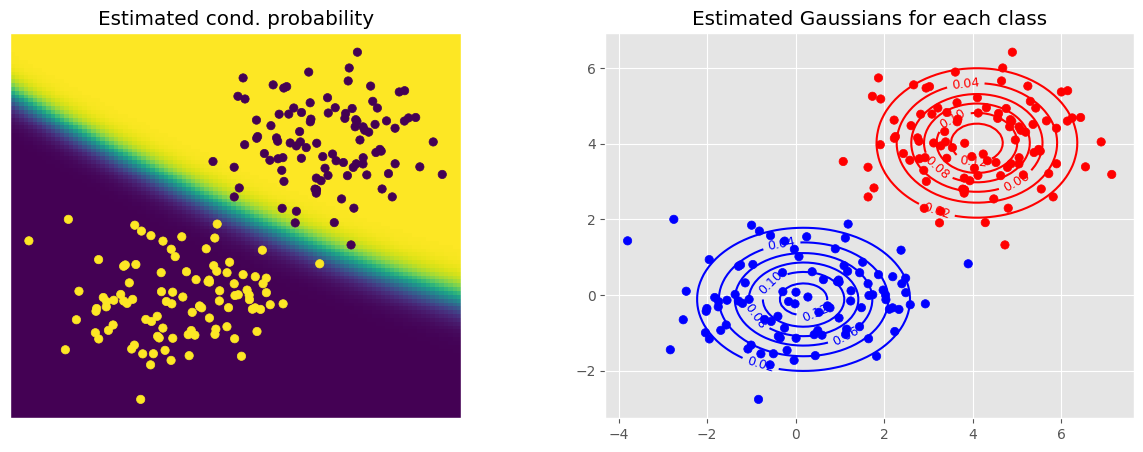

In [40]:
from helpers import plot_gaussian_bayes

x, y = generate1()
gnb = GaussianNaiveBayes()
gnb.fit(x, y)
print("Trafność na zbiorze uczącym:", np.mean(gnb.predict(x) == y))

x_test, y_test = generate1(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))
x_test, y_test = generate2(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))
x_test, y_test = generate3(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))

plot_gaussian_bayes(x, y, gnb)


Trafność na zbiorze uczącym: 1.0
Trafność na zbiorze testowym: 0.991
Trafność na zbiorze testowym: 1.0
Trafność na zbiorze testowym: 0.8375


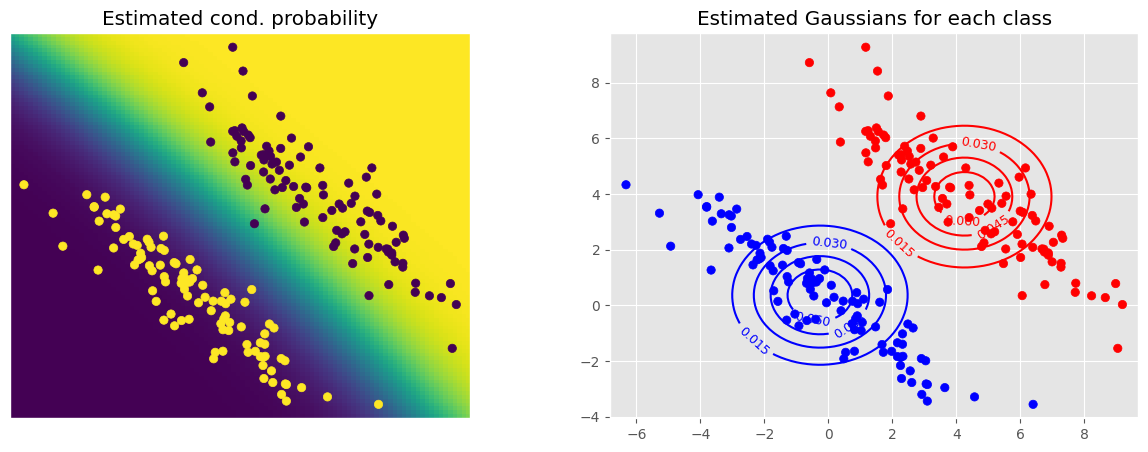

In [41]:
x, y = generate2()
gnb = GaussianNaiveBayes()
gnb.fit(x, y)
print("Trafność na zbiorze uczącym:", np.mean(gnb.predict(x) == y))

x_test, y_test = generate1(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))
x_test, y_test = generate2(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))
x_test, y_test = generate3(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))

plot_gaussian_bayes(x, y, gnb)

Trafność na zbiorze uczącym: 0.845
Trafność na zbiorze testowym: 0.9885
Trafność na zbiorze testowym: 0.9965
Trafność na zbiorze testowym: 0.833


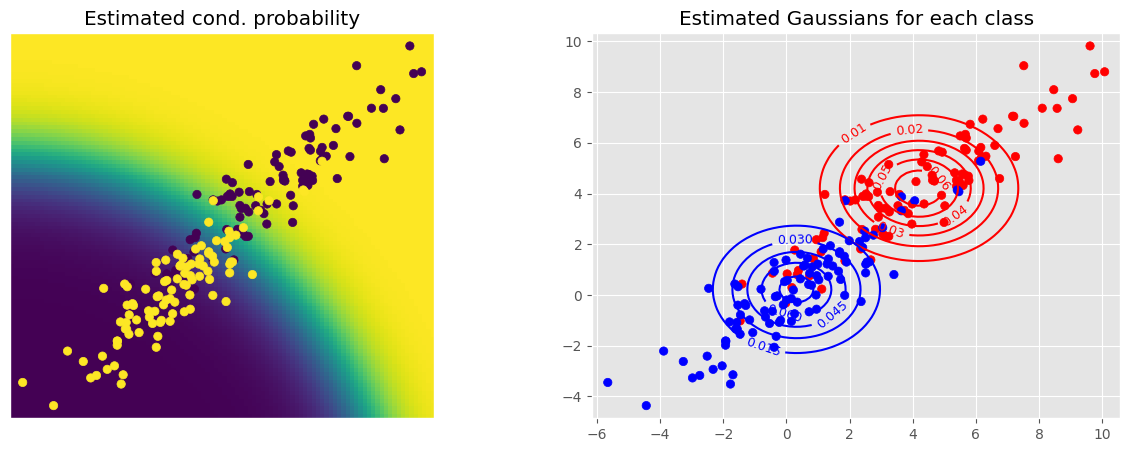

In [42]:
x, y = generate3()
gnb = GaussianNaiveBayes()
gnb.fit(x, y)
print("Trafność na zbiorze uczącym:", np.mean(gnb.predict(x) == y))

x_test, y_test = generate1(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))
x_test, y_test = generate2(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))
x_test, y_test = generate3(1000)
print("Trafność na zbiorze testowym:", np.mean(gnb.predict(x_test) == y_test))

plot_gaussian_bayes(x, y, gnb)

Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [43]:
gnb = GaussianNaiveBayes()
gnb.fit(x, y)

# Trafność na zbiorze uczącym
np.mean(gnb.predict(x) == y)

np.float64(0.845)

Narysowanie nauczonego klasyfikatora

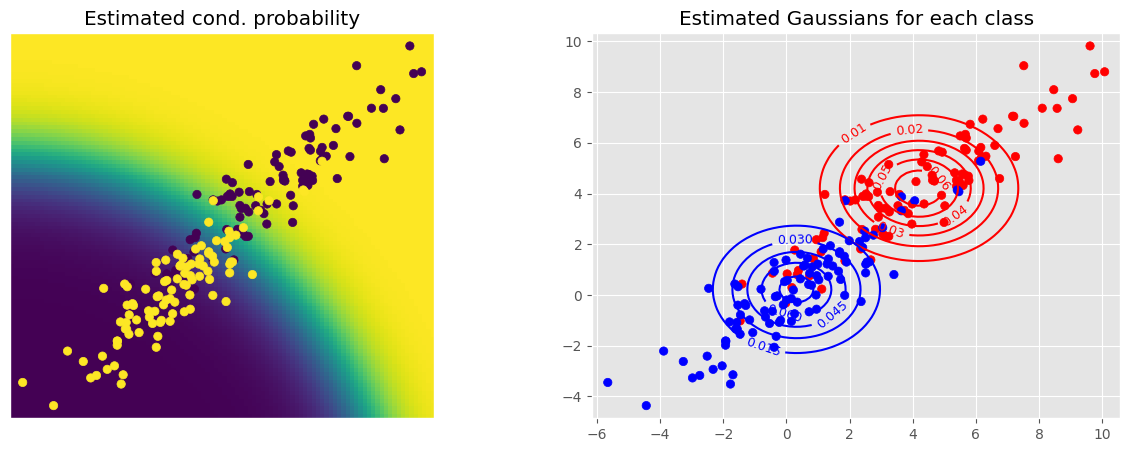

In [44]:
plot_gaussian_bayes(x, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [45]:
x_test, y_test = generate1(1000)
np.mean(gnb.predict(x_test) == y_test)

np.float64(0.9895)

**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 
 
 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.

2 GaussianNaiveBayes oraz GaussianBayes dają podobne wyniki dla obu zbiorów w których założenie o warunkowej niezależności zmiennych nie jest spełnione, ponieważ dane generowane generatorem 2 są całkiem dobrze rozdzielone, a dla tych generatora3 oba dają gorsze wyniki przez silne nakładanie się klas. 

4 Jednym z powodów, dla których klasyfikator nie osiąga 100% trafności, jest nakładanie się klas, które występuje, na przykład, przy użyciu Generatora 3, co prowadzi do gorszej skuteczności klasyfikatorów. Nawet w przypadku danych generowanych z rozkładów normalnych mogą występować wartości odstające, które również mogą wpłynąć na wyniki. Dodatkowo, błędy estymacji (prawdopodobieństw, średnich, odchyleń standardowych) mogą wprowadzać niedokładności w wynikach.

**Uwagi od prowadzącego:**
- (Niemal) wszystkie rozkłady się nakładają, w szczególności rozkład normalny.

5 [...]

**Uwagi od prowadzącego:**
- Niezależnie czy dane zbiory są łatwo separowalne, czy nie, to NB i tak będzie optymalnym rozwiązaniem.
- Możliwe byłoby znalezienie klasyfikatora o wyższej trafności (z innej klasy hipotez) --- jednak powiązane by to było z jego przeuczeniem. 
- **Klasyfikator optymalny**: $h*(x): f(x) + \epsilon$
- **Klasyfikator przeuczony**: $h*(x) = f(x + \epsilon)$



In [53]:
from helpers import GaussianBayes

x, y = generate1()
gnb = GaussianNaiveBayes()
gb = GaussianBayes()
gnb.fit(x, y)
gb.fit(x, y)
print(f"Trafność na zbiorze uczącym: GNB {np.mean(gnb.predict(x) == y)} vs GB: {np.mean(gb.predict(x) == y)}")

x_test, y_test = generate1(1000)
print(f"Trafność na zbiorze testowym1: GNB {np.mean(gnb.predict(x_test) == y_test)} vs GB: {np.mean(gb.predict(x_test) == y_test)}")
x_test, y_test = generate2(1000)
print(f"Trafność na zbiorze testowym2: GNB {np.mean(gnb.predict(x_test) == y_test)} vs GB: {np.mean(gb.predict(x_test) == y_test)}")
x_test, y_test = generate3(1000)
print(f"Trafność na zbiorze testowym3: GNB {np.mean(gnb.predict(x_test) == y_test)} vs GB: {np.mean(gb.predict(x_test) == y_test)}")

Trafność na zbiorze uczącym: GNB 0.995 vs GB: 0.99
Trafność na zbiorze testowym1: GNB 0.992 vs GB: 0.9925
Trafność na zbiorze testowym2: GNB 0.998 vs GB: 0.9985
Trafność na zbiorze testowym3: GNB 0.845 vs GB: 0.844


# Zadanie 2
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [47]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None)  # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [48]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [49]:
newsgroups_train.target[0:3]

array([0, 1, 0])

i do "zbinaryzowanego" tekstu

In [50]:
vectors[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(3, 23882))

Wytrenuj klasyfikator Naiwnego Bayesa z rozmywaniem estymat (patrz pakiet `sklearn`) i sprawdż jego trafność na zbiorze uczącym i testowym.

In [51]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

gnb = GaussianNaiveBayes()

gnb.fit(vectors, y_train)

y_pred_train = gnb.predict(vectors)
y_pred_test = gnb.predict(vectors_test)

train_acc = np.mean(y_pred_train == y_train)
test_acc = np.mean(y_pred_test == y_test)

print(f"Trafność na zbiorze uczącym: {train_acc:.4f}")
print(f"Trafność na zbiorze testowym: {test_acc:.4f}")

Trafność na zbiorze uczącym: 1.0000
Trafność na zbiorze testowym: 0.9234


**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?
 
 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

1 Ponieważ model analizuje prawdopodobieństwa przynależności słów do wszystkich klas, umożliwia to identyfikację słów charakterystycznych, które mają istotny wpływ na poprawne przypisanie klasy.

3 Tak, jednak redukcja cech nie powinna być przeprowadzana w sposób losowy. Należy zachować te słowa, które są charakterystyczne dla danej klasy (mające wysokie prawdopodobieństwo przynależności do tej klasy i niskie do pozostałych).

**Uwagi od prowadzącego:**
- Można by jeszcze rozszerzyć o stemming i lematyzację.

6 Model jest stosunkowo prosty do zrozumienia i implementacji, a także wykazuje dużą efektywność obliczeniową w przypadku dużych zbiorów danych. W przypadku, gdy liczba cech jest duża, algorytmy oparte na regułach czy drzewach decyzyjnych mogą stać się zbyt skomplikowane, co prowadzi do ich przeuczenia.

**Uwagi od prowadzącego:**
- Odpowiedź zbyt ogólna.
- Brak rozważań nt. gęstości danych i pojawienia się nowej, nie obserwowanej wcześniej próbki dla danej klasy.